<a href="https://colab.research.google.com/github/esragcetnky/Edureka-LSTM/blob/main/Edureka_%7C_LSTM_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Impoting Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Impoting Data
data=pd.read_csv("../input/national-names/NationalNames.csv")

## Analyze Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [14]:
data.shape

(1825433, 5)

In [15]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## Preprocessing Data

*Label encoder for gender column*

In [16]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [17]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


*We only need unique names*

In [18]:
df= data.groupby('Name').mean()['Gender'].reset_index()

In [19]:
df.shape

(93889, 2)

In [20]:
df.head()

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0


*Making gender's type int*

In [21]:
df['Gender']=df['Gender'].astype('int')

In [22]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [23]:
import string

*We need a list of alphabets to convert words to number*

In [24]:
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

*We can use vocab to encode letters to numbers*

In [25]:
vocab=dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

*We can use r_vocab to decode words*

In [26]:
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

*This function will return every letter in name column to number and save the result to dataframe*

In [27]:
def word_to_number():
  for i  in range(0,df.shape[0]):
    seq=[ vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]=seq

In [28]:
# to convert our names to list of equivalent numbers
word_to_number()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


*Let's see how our dataframe looks like after encoding*

In [29]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


*We need to determine the number of boxes in lstm. We will send each letter to one box, hence the number of letters has an impact on the number of boxes. If we use the maximum number of letters in a name then there will be lots of zeros which will bring loss and our accuracy is going to drop.*

*We can look histogrom of name length then we can decide the best number for boxes*

In [30]:
X=df['Name'].values
Y=df['Gender'].values

In [31]:
name_length=[len(X[i]) for i in range (0, df.shape[0])]

In [32]:
len(name_length)

93889

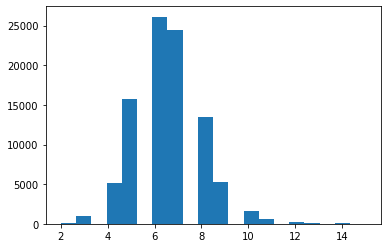

In [33]:
plt.hist(name_length,bins=20)
plt.show()

*We decided to have 10 boxes so next step we need to convert each names to 10 digit row*

In [34]:
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,
                maxlen=10,
                padding='pre')

In [35]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [36]:
x.shape

(93889, 10)

## Creating Model

In [37]:
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

In [38]:
vocab_size=len(vocab)+1
vocab_size

27

In [39]:
# input layer
inp=Input(shape=(10,))
# embedding layer 
emn=Embedding(input_dim=vocab_size,
              output_dim =5 )(inp)
# lstm layers
lstm1=LSTM(units=32,
           return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)

out=Dense(units=1,
          activation='sigmoid')(lstm2)

my_model=Model(inputs=inp,
               outputs=out)

2022-03-04 06:03:41.670449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 06:03:41.767263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 06:03:41.767986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 06:03:41.769254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [40]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 10, 5)             135       
_________________________________________________________________
lstm (LSTM)                  (None, 10, 32)            4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


## Compile & Train Model

In [41]:
my_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [42]:
his=my_model.fit(x,Y,epochs=10, batch_size=256,validation_split=0.2)

Epoch 1/10


2022-03-04 06:03:44.613701: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-04 06:03:47.707812: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


294/294 [==============================] - 7s 9ms/step - loss: 0.5624 - acc: 0.7140 - val_loss: 0.4185 - val_acc: 0.8076
Epoch 2/10
294/294 [==============================] - 2s 6ms/step - loss: 0.4110 - acc: 0.8057 - val_loss: 0.3865 - val_acc: 0.8222
Epoch 3/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3950 - acc: 0.8150 - val_loss: 0.3849 - val_acc: 0.8243
Epoch 4/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3900 - acc: 0.8167 - val_loss: 0.3858 - val_acc: 0.8241
Epoch 5/10
294/294 [==============================] - 2s 7ms/step - loss: 0.3870 - acc: 0.8184 - val_loss: 0.3799 - val_acc: 0.8271
Epoch 6/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3834 - acc: 0.8209 - val_loss: 0.3833 - val_acc: 0.8217
Epoch 7/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3792 - acc: 0.8231 - val_loss: 0.3738 - val_acc: 0.8284
Epoch 8/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3759 - acc:

## Visualize Result

In [43]:
plt.style.use('seaborn-darkgrid')

*Accuracy and Validation Accuracy*

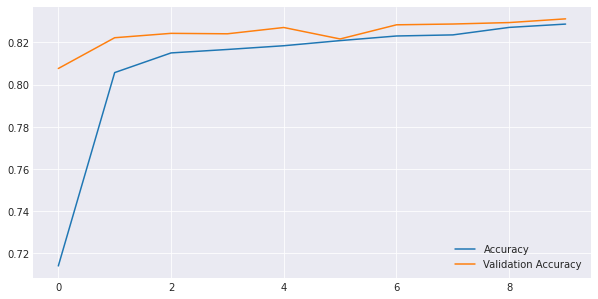

In [44]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['acc'],label='Accuracy')
ax.plot(his.history['val_acc'],label='Validation Accuracy')
ax.legend()
fig.show()

*Loss and Validation Loss*

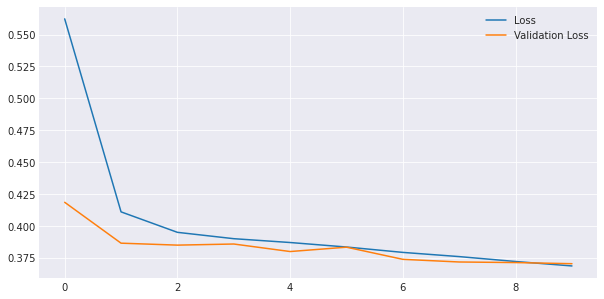

In [45]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['loss'],label='Loss')
ax.plot(his.history['val_loss'],label='Validation Loss')
ax.legend()
fig.show()

## Predict for Random Name

In [46]:
def predict_name(name):
  test_name=name.lower()
  seq=[vocab[i] for i in test_name]
  x_test=pad_sequences([seq],10)
  y_pred=my_model.predict(x_test)
  if y_pred < 0.5:
    print("Name is female...")
  else:
    print("Name is male...")

In [47]:
predict_name('Ugur')

Name is male...


In [48]:
predict_name('Ayse')

Name is female...


In [49]:
predict_name('Mustafa')

Name is female...


In [50]:
predict_name('Natasha')

Name is female...
